# Calculating rice cell growth parameters

The purposes of this document is to walk through the calculations of growth parameters $\mu_{max}$ and starting inoculation densities $M_0$ for each flask. After these are parameters are determined for each flask, an attempt is made to find a linear relationship between $\mu_{max}$ and ${M}_0$ for each flask. Statistical t-tests are performed on each parameter to determine if they are statistically significant. All parameters are found to be statistically significant and a statistically sigificant relationship between the starting inoculation density and the growth rate is derived. A lower inoculation density is correlated with a faster growth rate. 

In [1]:
#importing packages for data analysis 
import numpy as np #for matricies and data analysis 
import matplotlib.pyplot as pt #for plotting
from scipy.stats import t #t distribution for T value and t test 
import itertools  

In [2]:
#This cell processes the dry weight measurements from excel. 
#This is cut and pasted from the excel spreadsheet
#Each data point corresponds to one dry weight measurement.
#the dry weight measuremnets were completed in triplicate

#the format is:
#      F1.1 F1.2 F1.3 F2.1 F2.2 F2.3 ... F5.1 F5.2 F5.3 
#  day0
#  day1 
#  ...
# day14 

raw_data = [[8.75,7.218543046,6.933333333,2.88590604,5.874125874,5.570469799,3.285714286,3.020134228,1.824324324,3.886666667,4.256756757,5.1875,0.928571429,0.733333333,0.680272109],
[13.59477124,14.25531915,8.9375,11.18012422,12.30263158,9.533333333,6.490066225,6.845637584,5.297619048,8.75862069,9.6,7.533333333,3.642384106,7.032258065,2.795031056],
[17.4,16.86666667,12.125,15.51282051,12.17105263,16.66666667,10.63380282,8.421052632,10.50359712,11.70212766,12.07792208,11.17647059,3.164556962,3.267973856,1.8],
[14.5,12.08860759,11.86666667,12.1969697,12.93333333,15.98684211,13.69426752,14.13333333,16.05263158,11.0625,15.89285714,9.470198675,3.758389262,7.315436242,7.066666667],
[9.476744186,10.13333333,9.493670886,16,13.27044025,14.52229299,11.7,12.01342282,13.05732484,7.516778523,8.80952381,8.238993711,8.571428571,7.784431138,7.5],
[11.03225806,10.44303797,9.182389937,15,12.28070175,11.89944134,11.34228188,9.733333333,9.75,14.01273885,14.63576159,13.0625,8.55,10.26666667,9.937106918],
[6.174496644,7.152777778,6.824324324,15.53333333,14.49367089,14.16058394,12.24637681,10.85714286,11.78571429,9.823529412,8.4375,8.909090909,12.44047619,12.75449102,12.18934911]]

days = [0,2,4,6,8,10,12] #only 12 day g DW/L datapoints are currently in the spreadsheet 

In [3]:
#processing raw data by averaging each run and putting it into proper array  
nDays = len(days)
nFlasks = 5
nTrials = 3 
F_all = np.ndarray(shape = (nDays, nFlasks, nTrials), dtype = float) #all the data together in nice, clean, 3d array 

#used in forloop to clean things up 
i = 0 
j = 0 
flask = 0

#this section fills the 3d array with data 
j = 0 
flask = 0 
for row in raw_data:
    j = 0
    flask = 0
    for num in row:
        F_all[i][flask][j-3*flask] = num
        #print("i is %d, flask is %d, j-3*flask is %d" % (i,flask,j-3*flask))
        if((j+1)%3==0):
            flask = flask + 1 
        j = j + 1

    i = i + 1     

#now the average and standard deviation of each data point are calculated 
F_avg = np.average(F_all,axis=2)
F_std = np.std(F_all,axis=2)

#calculating the natural log of each datapoint 
lF_all = np.log(F_all)
lF_avg = np.average(lF_all,axis=2)
lF_std = np.std(lF_all,axis=2)

Text(0,0.5,'log(g DW/L)')

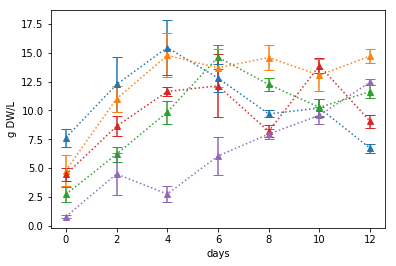

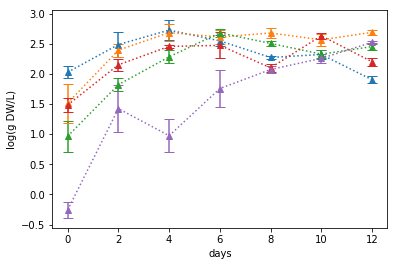

In [4]:
#plotting the data
pt.figure(1) #plot of the g DW/L versus days
for i in range(0,5):
    pt.errorbar(days,F_avg[:,i],F_std[:,i],linestyle=':', marker='^',capsize=5)
pt.xlabel("days")
pt.ylabel("g DW/L")

pt.figure(2) #plot of the ln(g DW/L) versus days 
for i in range(0,5):
    pt.errorbar(days,lF_avg[:,i],lF_std[:,i],linestyle=':', marker='^',capsize=5)
pt.xlabel("days")
pt.ylabel("log(g DW/L)")

In [5]:
#inorder to calculate mu and M0 the end of the growth phase 
#needs to be determined. This is done manually by simply looking at the graph 
#the index corresponds to the day that the growth ends. Use the following chart 
#to convert between days 
##################
## day ## index ##
##################
##  0  ##   0  ##
##  2  ##   1  ##
##  4  ##   2  ##
##  6  ##   3  ##
##  8  ##   4  ##
##  10 ##   5  ##
##  12 ##   6  ## 
##  14 ##   7  ##
################# 


iGrowthEnds = [2,2,3,2,5] #index growth ends 

Finally, we are onto the calculations. The first step is switching to a more farmilar, linear algebra notation that is inline with a book that I am using to go through this process. 

In [6]:
#now converting to d, G notation following inverse problems book layout 
m = np.size(days) #number of data points 
n = 2 #number model parameters (two)

#making G 
col1 = np.ones((m,1))
col2 = np.transpose(days) #x valus go in column 2 
G = np.matrix(np.column_stack((col1,col2)))
print("G is : ")
print(G)
#defining data matrix d. Note that only one column is used at a time in the calculations
#so d[:,i], rather than d is used in calculations 
d = np.matrix(lF_avg)
print("d is: ")
print(d)

#defining sigma for data 
sigma_d = lF_std #s^2 != sigma^2 but we assume it does because what else?
print("sigma d is: ")
print(sigma_d )


G is : 
[[ 1.  0.]
 [ 1.  2.]
 [ 1.  4.]
 [ 1.  6.]
 [ 1.  8.]
 [ 1. 10.]
 [ 1. 12.]]
d is: 
[[ 2.02734918  1.51595852  0.96536501  1.48410377 -0.25650843]
 [ 2.48569042  2.39291507  1.82038061  2.15037972  1.42366317]
 [ 2.72569298  2.68471264  2.2821635   2.45498686  0.97465664]
 [ 2.54671516  2.6109205   2.68046206  2.47252689  1.75645535]
 [ 2.2717655   2.67793755  2.50498757  2.10061642  2.07182105]
 [ 2.32134886  2.56419024  2.3271204   2.63106011  2.25703654]
 [ 1.90280716  2.68905421  2.45231382  2.20151291  2.52246712]]
sigma d is: 
[[0.10154277 0.32325237 0.25978545 0.12051899 0.13257131]
 [0.20979977 0.10518694 0.11044237 0.09994124 0.38790301]
 [0.16342896 0.13450369 0.1071943  0.03184734 0.27387321]
 [0.09042607 0.11622549 0.06868476 0.21691118 0.30612486]
 [0.03116705 0.07637933 0.04677274 0.06505012 0.05626478]
 [0.07691877 0.10253592 0.07171612 0.04685221 0.0796844 ]
 [0.06133106 0.03930053 0.0502246  0.0629263  0.01853303]]


Here we calculate the growth parameters without taking into account the error bars. This is how excel operates and what you would get from a typical, trendline fitting. The formula used is $\hat{\beta} = (G^{T}G)^{-1}G^Td$. The forloop ensures that the calculation is performed for each flask.  

In [7]:
Gmaster = G.copy() 
errors = np.ndarray(shape=(2,5))
beta_unw = np.ndarray(shape=(2,5),dtype=float) #this beta contains the fitting parameters 
for i in range(0,nFlasks):
    G = G[0:int(iGrowthEnds[i]+1),:] #this weird iGrowthEnd stuff simply truncates the matrix so only the growth days are used
    Gt = np.transpose(G)
    dtmp = d[0:int(iGrowthEnds[i]+1),i]
    beta_unw[:,i] = (np.linalg.inv(Gt*G)*Gt*dtmp).flatten()
    cov_tmp = np.linalg.inv(Gt*G)
    errors[0,i] = cov_tmp[0,0]
    errors[1,i] = cov_tmp[1,1]
    
    G = Gmaster.copy() 

print(beta_unw) #F1's slope is column 1 row 2 of the matrix printed below 
print("\n format of beta_unw")
print("  b1     b2     b3     b4      b5")
print("slope1 slope2 slope3 slope4 slope5")
print("here are the errors ")
print(errors)

[[2.06373896 1.61348501 1.09603169 1.54438191 0.27875901]
 [0.17458595 0.29218853 0.2803537  0.24272077 0.21848567]]

 format of beta_unw
  b1     b2     b3     b4      b5
slope1 slope2 slope3 slope4 slope5
here are the errors 
[[0.83333333 0.83333333 0.7        0.83333333 0.52380952]
 [0.125      0.125      0.05       0.125      0.01428571]]


Here the same calculation is performed again except taking into account the fact that there are errors in the dry weight measurements data. Those with higher standard deviations are weighted less heavily than those with smaller standard deviations. 
The weight matrix is given by $W = diag(\sigma_d)$. $G_{w} = WG$, $d_{w}=Wd$ and $\hat{\beta} = (G^T_wG_{w})^{-1}G_{w}^Td_{w}$. 
The covariance matrices for each flask parameters are also determined. The diagonal of the covariance matrices are the standard deviation for $\mu$ and the intercept b respectively. Calculating the coviarance matrix for beta involves using the formula $Cov(m_{L2}) = (G^T_wG_w)^{-1}G_w^TCov(d_w)G_w(G_w^TG_w)^{-1}$
we assume $Cov(d_w) = I_m $ since the data is composed of linearly independent measurements. This then simplifies to $Cov(d_w) = (G_w^TG_w)^{-1}$.

In [8]:
#calculating m taking into account std 
beta_w = np.ndarray(shape=(2,5),dtype=float) #beta wieghted 
betaCov_w = np.ndarray(shape=(5),dtype=np.matrix) #array of covariance matricies for each paramater 

for i in range(0,nFlasks):
    G = G[0:int(iGrowthEnds[i]+1),:]
    dtmp = d[0:int(iGrowthEnds[i]+1),i]    
    W = np.diag(1./sigma_d[0:int(iGrowthEnds[i]+1),i])
    Gw = W*G
    Gwt = np.transpose(Gw)
    dw = W*dtmp
    beta_w[:,i] = (np.linalg.inv(Gwt*Gw)*Gwt*dw).flatten()
    betaCov_w[i] = np.linalg.inv(Gwt*Gw) #(np.linalg.inv(Gwt*Gw)*Gwt*np.identity(int(iGrowthEnds[i])+1)*Gw*np.linalg.inv(Gwt*Gw))
    #print((np.linalg.inv(Gwt*Gw)*Gwt).shape)
    #print(x.shape)
    #betaCov_w[:][:][i]
    #calculating covariance matrix
    #invGwtGw = np.linalg.inv(Gwt*Gw) #thiis could be cleaned up. Will do later 
    #print((invGwtGw*Gwt*np.identity(m)*Gw*invGwtGw))
    #print(x)
    G = Gmaster.copy() 

print(beta_w) #same format as above 

[[ 2.0379144   1.88244318  1.2886628   1.57876911 -0.02145687]
 [ 0.17878657  0.2164302   0.23559837  0.22070703  0.24773206]]


The y intercept, b, determined in the previous calculation equals the natural log of the starting inoculation density. To determine the initial inocculation density $M_0 = exp(b)$ and the standard deviation is given by $\sigma_{M_{0}}=\sigma_b*M_0$. 

In [9]:
M0 = np.zeros(5)
M0_std = np.zeros(5)
mu_std = np.zeros(5)

mu_w_array = np.zeros(5)
b_w_array = np.zeros(5)

for i in range(0,nFlasks):
    #print(cov_m)
    mu_std[i] = betaCov_w[i][1,1]
    mu_w_array[i] = beta_w[1,i]
    b_w_array[i] = beta_w[0,i]
    
    print("Flask %d"%(i+1))
    print("mu_%d is = %0.3f +/- %0.4f" % (i+1,beta_w[1,i],betaCov_w[i][1,1]))
    M0[i] = np.exp(beta_w[0,i])
    M0_std[i] = betaCov_w[i][0,0]*M0[i]
    print("starting inocculation density is %0.3f +/- %0.4f"%(M0[i],M0_std[i]))

    print("")

Flask 1
mu_1 is = 0.179 +/- 0.0022
starting inocculation density is 7.675 +/- 0.0753

Flask 2
mu_2 is = 0.216 +/- 0.0049
starting inocculation density is 6.570 +/- 0.2565

Flask 3
mu_3 is = 0.236 +/- 0.0008
starting inocculation density is 3.628 +/- 0.0654

Flask 4
mu_4 is = 0.221 +/- 0.0008
starting inocculation density is 4.849 +/- 0.0520

Flask 5
mu_5 is = 0.248 +/- 0.0002
starting inocculation density is 0.979 +/- 0.0137



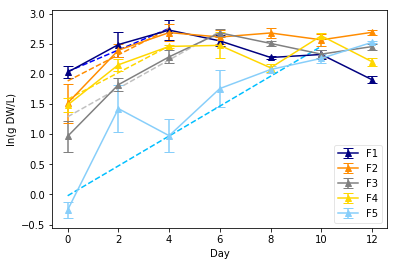

In [10]:
#here the data is plotted 
#you can change the colors if you like
ax = pt.figure(3)
colors2 = itertools.cycle(['blue','darkorange','silver','gold','deepskyblue'])
colors1 = itertools.cycle(['navy','darkorange','gray','gold','lightskyblue'])
for i in range(0,5):
    lb = "F"+str(i+1)
    #print(lb)
    xValues = np.linspace(0,iGrowthEnds[i]*2,num=100)
    pt.errorbar(days,lF_avg[:,i],lF_std[:,i],linestyle='-', marker='^',capsize=5,color=next(colors1),label=lb)
    pt.plot(xValues,mu_w_array[i]*xValues+ b_w_array[i],'--',color=next(colors2))
pt.legend(framealpha=0.5)
#ax.legend((F1,F2,F3,F4,F5), ('F1', 'F2', 'F3','F4','F5'))

pt.xlabel("Day")
pt.ylabel("ln(g DW/L)")
pt.savefig('output.png', dpi=300)


We use the following hypothosis testing framework $T_0 = \frac{| {{ \hat{\beta_1}-\beta_{1,0}| }}}{SE(\hat{\beta_1})}$ with the assumption that $SE(\hat{\beta_1}) = \sigma_{{\beta_1}}$ and $\beta_{1,0} = 0 $ 

In [11]:
#hypothosis testing prob that the slopes and intercepts are nonzero 
for i in range(0,nFlasks):
    sigma_b = betaCov_w[i][0,0] #SE for intercept
    sigma_mu = betaCov_w[i][1,1] #SE for specific growth rate 
    
    T0_mu = abs(beta_w[0,i]-0)/sigma_mu #for slope 
    T0_b = abs(beta_w[1,i]-0)/sigma_b #for slope 

    p_mu = (1 - t.cdf(T0_mu,df=m-n))*2
    p_b = (1 - t.cdf(T0_b,df=m-n))*2 

    print("flask %d: p_mu is %.2E and p_b is %.2E" %(i+1,p_mu,p_b))


flask 1: p_mu is 3.00E-14 and p_b is 9.15E-06
flask 2: p_mu is 2.19E-12 and p_b is 2.62E-03
flask 3: p_mu is 1.33E-15 and p_b is 4.67E-05
flask 4: p_mu is 6.66E-16 and p_b is 5.01E-06
flask 5: p_mu is 1.92E-09 and p_b is 1.07E-05


This is the end of the analysis of the calculations of $\mu_{max}$ and $M_0$. 
The next part of this document attemps to find a relationship between the starting inocculation density, M_0 and the specific growth rate ${\mu_{max}}$. There are two ways to do this fitting $\mu_{max}$ vesus $M_0$ and $M_0$ versus $\mu_{max}$. Since it is assumed that their is no error in x, which is not actually true the parameter errors followed by the t values are calculated for both fittings. There are ways to do fitting with error in x and y, but it is complex and requires a lot of excess work. 


(5, 2)
[[  28.49296914 -110.73571542]]

[[ 0.05658169 -0.23163997]
 [-0.23163997  0.95106629]]
flask 5: p_mu is 8.86E-10 and p_b is 3.11E-07


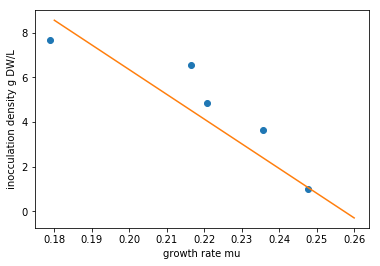

In [12]:
#M0 versus mu 
col2 = np.transpose(beta_w[1,:])
col1 = np.ones((len(col2),1))


G = np.matrix(np.column_stack((col1,col2)))
print(G.shape)
d = np.matrix(M0).transpose()

W = np.diag(1./M0_std)
Gw = W*G
Gwt = np.transpose(Gw)
dw = np.matrix(W*d)

beta_muM0 = (np.linalg.inv(Gwt*Gw)*Gwt*dw).flatten()
betaCov_muM0 = (np.linalg.inv(Gwt*Gw)*Gwt*np.identity(5)*Gw*np.linalg.inv(Gwt*Gw))
print(beta_muM0)
print("")
print(betaCov_muM0)
xPoints = np.linspace(0.18,0.26,num=100)
pt.figure(3)
pt.plot(beta_w[1,:],M0,'o')
pt.xlabel("growth rate mu")
pt.ylabel("inocculation density g DW/L")
pt.plot(xPoints,beta_muM0[0,1]*xPoints+beta_muM0[0,0],'-')

T0_mu = abs(beta_muM0[0,1]-0)/betaCov_muM0[1,1] #for slope 
T0_b = abs(beta_w[0,0]-0)/betaCov_muM0[0,0]  #for slope 
p_mu = (1 - t.cdf(T0_mu,df=m-n))*2
p_b = (1 - t.cdf(T0_b,df=m-n))*2 
print("flask %d: p_mu is %.2E and p_b is %.2E" %(i+1,p_mu,p_b))


[[ 0.25492106 -0.00703991]]

[[ 9.24479208e-08 -3.57073980e-08]
 [-3.57073980e-08  2.40926604e-08]]

[[0.17878657 0.2164302  0.23559837 0.22070703 0.24773206]]
R^2 is 0.784284 


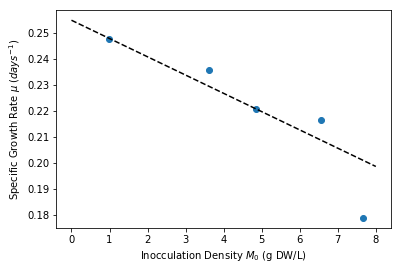

In [13]:
#now Mo versus mu
col1 = np.ones((5,1))
col2 = np.transpose(np.matrix(M0))
G = np.matrix(np.column_stack((col1,col2)))
d = np.matrix(beta_w[1,:]).transpose()
W = np.diag(1./mu_std)
Gw = W*G
Gwt = np.transpose(Gw)
dw = np.matrix(W*d)

beta_muM0 = (np.linalg.inv(Gwt*Gw)*Gwt*dw).flatten()
betaCov_muM0 = (np.linalg.inv(Gwt*Gw)*Gwt*np.identity(5)*Gw*np.linalg.inv(Gwt*Gw))
print(beta_muM0)
print("")
print(betaCov_muM0)
print("")
xPoints = np.linspace(0,8,num=100)
pt.figure(3)
pt.plot(M0,beta_w[1,:],'o')
pt.ylabel("Specific Growth Rate ${\mu}$ $(days^{-1})$ ")
pt.xlabel("Inocculation Density $M_0$ (g DW/L)")
pt.plot(xPoints,beta_muM0[0,1]*xPoints+beta_muM0[0,0],'--',color="k")

T0_mu = abs(beta_muM0[0,1]-0)/betaCov_muM0[1,1] #for slope 
T0_b = abs(beta_w[0,0]-0)/betaCov_muM0[0,0]  #for intercept 

p_mu = (1 - t.cdf(T0_mu,df=m-n))*2
p_b = (1 - t.cdf(T0_b,df=m-n))*2 
pt.savefig('muVsM0.png', dpi=300)

#R^2 calculation
beta = beta_muM0.transpose()
SStot = ((d-G*beta).transpose()*(d-G*beta))[0,0]
avg = np.average(d)
print(d.flatten()[0,:])
SSreg = np.sum(np.asarray(d.flatten()-avg)**2)
Rsqr = 1-SStot/SSreg
print(("R^2 is %0.6f ")%(Rsqr))
